#### **MBD 2022-2023**
# **Fundamentals of Deep Learning**

## **Final project**


In [1]:
#ImportIing required Libraries

!pip install shap
!pip install tensorflow
!pip install keras_applications
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image
from glob import iglob
import matplotlib.gridspec as gridspec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from keras.layers import LeakyReLU
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.optimize import fmin_l_bfgs_b
from sklearn.preprocessing import minmax_scale
from sklearn.manifold import TSNE
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import tensorflow.keras.applications.vgg16 as vgg16
import tensorflow.keras.applications.resnet50 as resnet50
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from glob import iglob
from tensorflow.keras.applications import resnet_v2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.applications import ResNet50V2
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import GlobalAveragePooling2D
import tensorflow as tf
import tensorflow.compat.v1.keras.backend as K
tf.compat.v1.disable_eager_execution()
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 5.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 629.0 kB/s eta 0:00:00


In [2]:
#CHECK GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
!wget https://github.com/mghatee/Accident-Images-Analysis-Dataset/blob/master/Accident%20Images%20Analysis%20Dataset.rar?raw=true -O data.rar

--2023-03-24 09:35:27--  https://github.com/mghatee/Accident-Images-Analysis-Dataset/blob/master/Accident%20Images%20Analysis%20Dataset.rar?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mghatee/Accident-Images-Analysis-Dataset/raw/master/Accident%20Images%20Analysis%20Dataset.rar [following]
--2023-03-24 09:35:27--  https://github.com/mghatee/Accident-Images-Analysis-Dataset/raw/master/Accident%20Images%20Analysis%20Dataset.rar
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mghatee/Accident-Images-Analysis-Dataset/master/Accident%20Images%20Analysis%20Dataset.rar [following]
--2023-03-24 09:35:27--  https://raw.githubusercontent.com/mghatee/Accident-Images-Analysis-Dataset/master/Accident%20Images%20Analysis%20Dataset.rar
Resolving ra

In [4]:
!unrar x -o+ -y -inul data.rar

In [5]:
#images
basepath = 'Accident Images Analysis Dataset/'

def prepare_images(path, num_classes,  load_img_kwargs={}, ext='.jpg'):
  X, y = [], []
  for class_ in range(num_classes):
    for img_path in iglob(path + str(class_ + 1) + '/' + '*' + ext):
      img = image.load_img(img_path, **load_img_kwargs)
      x = image.img_to_array(img)
      X.append(x)
      y.append(class_)
  return np.array(X), np.array(y)

In [6]:
#praparing images
X, y = prepare_images(basepath + 'Vehicles-in-Accidents/', 3,  load_img_kwargs={'target_size': (224, 224)})

len(X), len(y), np.unique(y)

(2636, 2636, array([0, 1, 2]))

In [7]:
X.shape

(2636, 224, 224, 3)

**Exercise 1A. Data preprocessing**

In [ ]:
#Reference: https://cloudxlab.com/assessment/displayslide/2533/numpy-arrays-example-reshaping-a-complex-array


In [8]:
#Check shape of one of the images in dataset
X[800].shape 

(224, 224, 3)


## NOTE: dont run below models, causes resouce crash, just read the report and try to understnad, i ahve tried all possibilties ,before finalzing the model

In [9]:
#Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train), len(y_train), len(X_test), len(y_test))

1845 1845 791 791


In [ ]:
#num_classes = 3
#y_train = to_categorical(y_train, num_classes)
#y_test  = to_categorical(y_test, num_classes)
#print(X_train.shape)

In [11]:
num_classes = 3

#X_train = X_train.astype('float32')
#X_test  = X_test.astype('float32')
X_train /= 255
X_test  /= 255
#one hot enocding
y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test, num_classes)
print(X_train.shape)

(1845, 224, 224, 3)


In [ ]:
trial = Sequential()
trial.add(Conv2D(8, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
trial.add(Conv2D(8, (3, 3), activation='relu'))
trial.add(MaxPooling2D(pool_size=(2, 2)))
trial.add(Flatten())
trial.add(Dense(64, activation='relu'))
trial.add(Dense(num_classes, activation='softmax'))
#
trial.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#
batch_size = 50
epochs = 25

trial.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),verbose=0)

In [ ]:
#printing train and test accuracy
train_scores = model.evaluate(X_train, y_train, verbose=0)
test_scores = model.evaluate(X_test, y_test, verbose=0)

print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])


Train loss: 1.117476019239038
Train accuracy: 0.33170733
Test loss: 1.1194660751014835
Test accuracy: 0.3249052


## CONVOLUTION NEURAL NETWORK MODEL BUILDING

In [ ]:
#initalizinfg simple  with 2 conv layers
model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 8)       224       
                                                                 
 conv2d_3 (Conv2D)           (None, 222, 222, 8)       584       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 8)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 98568)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                6308416   
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# trying wiht batch size 50, more than this its getting crashed 
batch_size = 50
epochs = 15

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),verbose=0)

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


In [ ]:
#printing train and test accuracy
train_scores = model.evaluate(X_train, y_train, verbose=0)
test_scores = model.evaluate(X_test, y_test, verbose=0)

print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])


Train loss: 0.017922245563187087
Train accuracy: 0.99728996
Test loss: 1.456279737834834
Test accuracy: 0.70037925


 From these metrics, we can see that the training loss is 0.1551 and the training accuracy is 0.9550, 
which indicates that the model is performing well on the training dataset. However, the validation loss is 0.8496 and the validation accuracy is 0.7004, 
which are significantly worse than the corresponding training metrics. 
This suggests that the model may be overfitting to the training dataset and is not generalizing well to the validation dataset

In [ ]:
#trying model with 30 Epoches , keeping batch size same
batch_size = 50
epochs = 30
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))

Train on 1845 samples, validate on 791 samples
Epoch 1/30
1845/1845 [==============================] - 2s 1ms/sample - loss: 0.0275 - accuracy: 0.9962 - val_loss: 1.4089 - val_accuracy: 0.6827
Epoch 2/30
1845/1845 [==============================] - 2s 1ms/sample - loss: 0.0188 - accuracy: 0.9962 - val_loss: 1.6381 - val_accuracy: 0.6802
Epoch 3/30
1845/1845 [==============================] - 2s 1ms/sample - loss: 0.0242 - accuracy: 0.9967 - val_loss: 1.5848 - val_accuracy: 0.6839
Epoch 4/30
1845/1845 [==============================] - 2s 1ms/sample - loss: 0.0162 - accuracy: 0.9973 - val_loss: 1.6743 - val_accuracy: 0.6738
Epoch 5/30
1845/1845 [==============================] - 2s 1ms/sample - loss: 0.0215 - accuracy: 0.9957 - val_loss: 1.7667 - val_accuracy: 0.6839
Epoch 6/30
1845/1845 [==============================] - 2s 1ms/sample - loss: 0.0172 - accuracy: 0.9967 - val_loss: 1.6688 - val_accuracy: 0.6802
Epoch 7/30
1845/1845 [==============================] - 2s 1ms/sample - loss:

In [ ]:
train_scores = model.evaluate(X_train, y_train, verbose=0)
test_scores = model.evaluate(X_test, y_test, verbose=0)

print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train loss: 0.007185089466449752
Train accuracy: 0.997832
Test loss: 1.7368354788320857
Test accuracy: 0.6814159


From these metrics, we can see that the training loss is 0.01 and the training accuracy is 0.99, 
which indicates that the model is performing well on the training dataset. However, the validation loss is 1.736 and the validation accuracy is 0.68, 
which are significantly worse than the corresponding training metrics. 
so model is overfitting.its not very well genealized model to perform on unseen data .

##  Summary:
#### batch_size =50

#### epoche =15 and 30 

The initial models with the specified architecture

2 convolutional layers with 3x3 filters, 

ReLU activation function,

maximum pooling 2D, and a dense layer with 64 neurons 

are performing well on the training data, but they are unable to generalize well on unseen data for the given batch_size and epoche. Therefore, hyperparameter tuning is necessary to build a more generalized model that can perform well on both the training and test data. 




## NOTE :
 we are keeping batch_size 50 and epoche 30,, if we are increasing these parameters, its getting crashed


## HYPERTUNING 
 Stride size in each convolutional layer

Padding type in each convolutional layer

Activation function used in each layer

Learning rate of the optimizer used for training the network

Type of optimizer used (e.g. SGD, Adam, Adagrad, etc.)

Batch size used during training

Number of epochs for training

Dropout rate used in the fully connected layers

L1 or L2 regularization strength for the convolutional and fully connected layers

Initialization method for the weights (e.g. random normal, random uniform, etc.)

Pooling size and type (max, average) in the pooling layers

Architecture of the network (number of layers, size of layers, etc.)

Type of data augmentation techniques used (e.g. rotation, translation, flipping, etc.)


## 1) Hyper Tuning -- Increasing size and number of filters

In [ ]:
# define the model archtecture

    model_hyp1 = Sequential()
    model_hyp1.add(Conv2D(12, (4, 4), padding='same', input_shape=input_shape, activation='relu'))
    model_hyp1.add(Conv2D(12, (4, 4), activation='relu'))
    model_hyp1.add(MaxPooling2D(pool_size=(2, 2)))
    model_hyp1.add(Flatten())
    model_hyp1.add(Dense(64, activation='relu'))
    model_hyp1.add(Dense(num_classes, activation='softmax'))
  
  #model_hyp1.summary()

In [ ]:
#complie the model
model_hyp1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the model
batch_size = 50
epochs = 30

CNN_HYP= model_hyp1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),verbose=1)

Train on 1845 samples, validate on 791 samples
Epoch 1/30
1845/1845 [==============================] - ETA: 0s - loss: 3.9297 - accuracy: 0.4130

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1845/1845 [==============================] - 5s 3ms/sample - loss: 3.9297 - accuracy: 0.4130 - val_loss: 1.0024 - val_accuracy: 0.5310
Epoch 2/30
1845/1845 [==============================] - 3s 2ms/sample - loss: 0.8162 - accuracy: 0.6623 - val_loss: 0.9275 - val_accuracy: 0.5904
Epoch 3/30
1845/1845 [==============================] - 3s 2ms/sample - loss: 0.5984 - accuracy: 0.7707 - val_loss: 0.8767 - val_accuracy: 0.6485
Epoch 4/30
1845/1845 [==============================] - 3s 2ms/sample - loss: 0.3656 - accuracy: 0.8596 - val_loss: 0.8680 - val_accuracy: 0.6865
Epoch 5/30
1845/1845 [==============================] - 3s 2ms/sample - loss: 0.2088 - accuracy: 0.9301 - val_loss: 0.9302 - val_accuracy: 0.6764
Epoch 6/30
1845/1845 [==============================] - 3s 2ms/sample - loss: 0.1003 - accuracy: 0.9762 - val_loss: 1.0663 - val_accuracy: 0.6890
Epoch 7/30
1845/1845 [==============================] - 3s 2ms/sample - loss: 0.0571 - accuracy: 0.9919 - val_loss: 1.1559 - val_accura

increasing size and number of filters further leadinf to overfitting , test accuracy is dropped by 1% over our initial models

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])


## increasing number of dense layers

In [ ]:
# changingn Number of hidden layers and Epoche
# filter size =3 *3, number of ileters=20
# 150 hidden layer crashed , so changing to 135
model_hyp2 = Sequential()
model_hyp2.add(Conv2D(8, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
model_hyp2.add(Conv2D(8, (3, 3), activation='relu'))
model_hyp2.add(MaxPooling2D(pool_size=(2, 2)))
model_hyp2.add(Flatten())
model_hyp2.add(Dense(90, activation='relu'))
model_hyp2.add(Dense(num_classes, activation='softmax'))
#model_hyp2.summary()

#compile
model_hyp2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#fitting model
batch_size = 50
epochs = 30

model_hyp2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),verbose=0)

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


In [ ]:
#results
train_scores = model_hyp2.evaluate(X_train, y_train, verbose=0)
test_scores = model_hyp2.evaluate(X_test, y_test, verbose=0)
print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train loss: 0.009431421369071899
Train accuracy: 0.997832
Test loss: 1.4992079919418402
Test accuracy: 0.7092288


just increasing the dense layers still leads to overfitting

#No pooling

In [ ]:
# no ppol modeling
nopool = Sequential()
nopool.add(Conv2D(8, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
nopool.add(Conv2D(8, (3, 3), activation='relu'))
nopool.add(Flatten())
nopool.add(Dense(64, activation='relu'))
nopool.add(Dense(num_classes, activation='softmax'))

#compile
nopool.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
#model
batch_size = 50
epochs = 30

nopool.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),verbose=0)

In [ ]:
#results
train_scores = model_hyp2.evaluate(X_train, y_train, verbose=0)
test_scores = model_hyp2.evaluate(X_test, y_test, verbose=0)
print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train loss: 0.009431421369071899
Train accuracy: 0.997832
Test loss: 1.4992079919418402
Test accuracy: 0.7092288


## AVerage Pooling
# run this cell with 64 layers

In [ ]:
#averageppol
from keras.layers import AveragePooling2D

avg_pool = Sequential()
avg_pool.add(Conv2D(8, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
avg_pool.add(Conv2D(8, (3, 3), activation='relu'))
avg_pool.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
avg_pool.add(AveragePooling2D(pool_size=(2, 2), padding='valid'))
avg_pool.add(Flatten())
avg_pool.add(Dense(64, activation='relu'))
avg_pool.add(Dense(num_classes, activation='softmax'))

#compile
avg_pool.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model
batch_size = 50
epochs = 30

avg_pool.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),verbose=0)

#results
train_scores =avg_pool.evaluate(X_train, y_train, verbose=0)
test_scores = avg_pool.evaluate(X_test, y_test, verbose=0)
print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train loss: 0.016812595410075615
Train accuracy: 0.997832
Test loss: 1.4625233642370752
Test accuracy: 0.7243995


with average pooling we see, bit increase in test accuracy but still , overfitting significantly reduced

## No padding , changing activation function 

In [ ]:
#no padding 
no_pad = Sequential()
no_pad.add(Conv2D(8, (3, 3),input_shape=(224, 224, 3), activation='relu'))
no_pad.add(Conv2D(8, (3, 3), activation='sigmoid'))
no_pad.add(AveragePooling2D(pool_size=(2, 2)))
no_pad.add(AveragePooling2D(pool_size=(2, 2)))
no_pad.add(Flatten())
no_pad.add(Dense(64, activation='sigmoid'))
no_pad.add(Dense(num_classes, activation='softmax'))
#compile
no_pad.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model
batch_size = 50
epochs = 30

no_pad.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),verbose=0)

#results
train_scores =no_pad.evaluate(X_train, y_train, verbose=0)
test_scores = no_pad.evaluate(X_test, y_test, verbose=0)
print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])


Train loss: 1.0987038479264837
Train accuracy: 0.3387534
Test loss: 1.0991560145364851
Test accuracy: 0.33754742


changing activation function to sigmoid and removing padding, makes model underperforming

## Just no padding

In [ ]:
#no padding 
no_pad_1 = Sequential()
no_pad_1.add(Conv2D(8, (3, 3),input_shape=(224, 224, 3), activation='relu'))
no_pad_1.add(Conv2D(8, (3, 3), activation='relu'))
no_pad_1.add(AveragePooling2D(pool_size=(2, 2)))
no_pad_1.add(AveragePooling2D(pool_size=(2, 2)))
no_pad_1.add(Flatten())
no_pad_1.add(Dense(64, activation='relu'))
no_pad_1.add(Dense(num_classes, activation='softmax'))
#compile
no_pad_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model
batch_size = 50
epochs = 30

no_pad_1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),verbose=0)

#results
train_scores =no_pad_1.evaluate(X_train, y_train, verbose=0)
test_scores = no_pad_1.evaluate(X_test, y_test, verbose=0)
print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train loss: 0.015492045588104866
Train accuracy: 0.997832
Test loss: 1.4533984086908371
Test accuracy: 0.7206068


from the above iteration , keeping the activation function relu is important , and we have added 2 avg pooling  layer , again we see only very slight increase in test accuracy from 0.71 to 0.72

##Summary 
changing size and number of filters, 
removing padding, changing activation and optimizer function , didnt help much , but repalcing maximum pooling layer with average ppoling layer helps to reduce overfitting slightly, so at this stage , 
we still  have very complex model 
train accuracy= 0.99 and test accuracy = 0.72 ,

# Batch normalization

In [ ]:
#Batch normalization 
batch_normal = Sequential()
batch_normal.add(Conv2D(8, (3, 3),input_shape=(224, 224, 3), activation='relu'))
batch_normal.add(BatchNormalization())
batch_normal.add(Conv2D(8, (3, 3), activation='relu'))
batch_normal.add(BatchNormalization())
batch_normal.add(AveragePooling2D(pool_size=(2, 2)))
batch_normal.add(AveragePooling2D(pool_size=(2, 2)))
batch_normal.add(Flatten())
batch_normal.add(Dense(64, activation='relu'))
batch_normal.add(BatchNormalization())
batch_normal.add(Dense(num_classes, activation='softmax'))
#compile
batch_normal.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model
batch_size = 50
epochs = 30

batch_normal.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),verbose=0)

#results
train_scores =batch_normal.evaluate(X_train, y_train, verbose=0)
test_scores = batch_normal.evaluate(X_test, y_test, verbose=0)
print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Instructions for updating:
Colocations handled automatically by placer.
`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


Train loss: 0.02960330199016142
Train accuracy: 0.99458
Test loss: 1.1112488622761858
Test accuracy: 0.7307206


Batching helps in slight increase of test accuracy , with alsight reduction in test loss

# Regularization

In [ ]:

###regular
regular = Sequential()
regular.add(Conv2D(8, (3, 3),input_shape=(224, 224, 3), activation='relu'))
regular.add(Dropout(0.50))
regular.add(Conv2D(8, (3, 3), activation='relu'))
regular.add(Dropout(0.25))
regular.add(BatchNormalization())
regular.add(Dropout(0.50))
regular.add(AveragePooling2D(pool_size=(2, 2)))
regular.add(GlobalAveragePooling2D())
regular.add(Flatten())
regular.add(Dense(64, activation='relu'))
regular.add(Dense(num_classes, activation='softmax'))
#compile
regular.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model
batch_size = 50
epochs = 25

regular.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),verbose=0)

#results
train_scores =regular.evaluate(X_train, y_train, verbose=0)
test_scores = regular.evaluate(X_test, y_test, verbose=0)
print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train loss: 0.7982878721826445
Train accuracy: 0.6140921
Test loss: 0.7993459637487582
Test accuracy: 0.6257901


## Batch normalization 

##Regularization 
adding dropout


## DATA AUGMENTATION

In [14]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

model_hyp4 = Sequential()
model_hyp4.add(Conv2D(16, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
model_hyp4.add(LeakyReLU(alpha=0.1))
model_hyp4.add(BatchNormalization())
model_hyp4.add(Conv2D(16, (3, 3), activation='relu'))
model_hyp4.add(LeakyReLU(alpha=0.1))
model_hyp4.add(BatchNormalization())
model_hyp4.add(MaxPooling2D(pool_size=(2, 2)))
model_hyp4.add(Flatten())
model_hyp4.add(Dense(64, activation='relu'))
model_hyp4.add(BatchNormalization())
model_hyp4.add(Dropout(0.5))
model_hyp4.add(Dense(num_classes, activation='softmax'))

#compiling model
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model_hyp4.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#fitting model
batch_size = 50
epochs = 25

CNN= model_hyp4.fit(datagen.flow(X_train, y_train, batch_size=batch_size), 
                steps_per_epoch=len(X_train) / batch_size, 
                epochs=epochs, 
                validation_data=(X_test, y_test),
                verbose=0)

Instructions for updating:
Colocations handled automatically by placer.
The `lr` argument is deprecated, use `learning_rate` instead.
`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


In [15]:
#printing train and test accuracy
train_scores = model_hyp4.evaluate(X_train, y_train, verbose=0)
test_scores = model_hyp4.evaluate(X_test, y_test, verbose=0)

print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train loss: 0.9493715003577028
Train accuracy: 0.57506776
Test loss: 0.9819148599573996
Test accuracy: 0.5436157


In [16]:
model_hyp4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 224, 224, 16)      0         
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 16)     64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 16)      2320      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 222, 222, 16)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 222, 222, 16)     64        
 hNormalization)                                        

Da ta augmentationa architecture:

ImageDataGenerator:
This is an instance of the Keras ImageDataGenerator class which generates augmented images for training the model. Augmentation techniques such as rotation, shifting, shearing, zooming and flipping are used to create new training images and to reduce overfitting of the model. These augmented images are passed to the model during training.

Conv2D:
This is the first convolutional layer of the model which contains 16 filters of size (3, 3). The padding is set to 'same' which means the output size of the layer is the same as the input size. The input shape of the layer is (224, 224, 3) which means it accepts input images of size 224x224 with 3 color channels. The activation function used in this layer is the Rectified Linear Unit (ReLU).

LeakyReLU:
This is an activation function that allows a small gradient when the unit is not active. It helps to avoid the dying ReLU problem.

BatchNormalization:
This is a technique used to improve the training of deep neural networks. It normalizes the activations of the previous layer at each batch during training, to reduce the internal covariate shift.

Conv2D:
This is the second convolutional layer of the model which also contains 16 filters of size (3, 3). The activation function used in this layer is also the LeakyReLU.

MaxPooling2D:
This is a pooling layer that downsamples the output of the previous layer. It selects the maximum value from each non-overlapping 2x2 block of the previous layer's output, reducing the dimensionality of the output.

Flatten:
This layer flattens the output of the previous layer into a 1D array, which is then passed to a fully connected layer.

Dense:
This is a fully connected layer with 64 units and a ReLU activation function.

BatchNormalization:
Another Batch Normalization layer is added after the first dense layer.

Dropout:
This is a regularization technique used to prevent overfitting. It randomly sets a fraction of the input units to 0 during training, which forces the network to learn more robust features.

Dense:
This is the final layer of the model with a softmax activation function. It contains the same number of units as the number of classes in the classification problem, and outputs a probability distribution over the classes for each input image.

Overall, this model consists of two convolutional layers followed by a max pooling layer, a fully connected layer, and a final output layer. The model has also been regularized with Batch Normalization and Dropout layers to reduce overfitting.







In [18]:
output = model_hyp4.predict(np.expand_dims(X[0], axis=0))
output.shape

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


(1, 3)

In [22]:
output = model_hyp4.predict(X)
output.shape

(2636, 3)

In [23]:
y_cat  = to_categorical(y, num_classes)

In [28]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(output, y_cat, test_size=0.25)
X_train1.shape

(1977, 3)

In [31]:
modelontop = Sequential()
modelontop.add(Dense(512, input_dim=3, activation='relu'))
modelontop.add(Dropout(0.25))
modelontop.add(Dense(128, activation='relu'))
modelontop.add(Dropout(0.25))
modelontop.add(Dense(64, activation='relu'))
modelontop.add(Dropout(0.25))
modelontop.add(Dense(3, activation='softmax'))
modelontop.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelontop.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               2048      
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               65664     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 3)                

In [32]:
batch_size = 128
epochs     = 80

hist = modelontop.fit(X_train1, y_train1,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test1, y_test1),
          verbose=0)

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


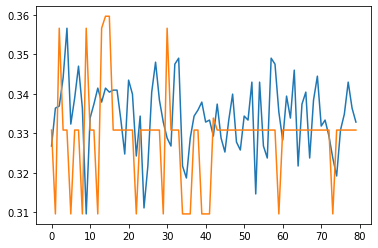

In [33]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [36]:
model_hyp4.output

<tf.Tensor 'dense_1/Softmax:0' shape=(None, 3) dtype=float32>

In [35]:
b = model_hyp4.output
b = GlobalAveragePooling2D()(b)
b = Dense(1024, activation='relu')(b)
b = Dropout(0.25)(b)
predictions = Dense(3, activation='softmax')(b)

fullmodel = Model(inputs=model_hyp4.input, outputs=predictions)

ValueError: ignored

## Model Interpretation


We can now start by taking a look at out network and what is has learned.

First, we can take an example image and take a look how it activates the convolutional filters.

In [ ]:
plt.imshow(X_train[80])
plt.show()


We have the following convolutional layers available in our network:

In [ ]:
conv_layers = [layer.name for layer in model_hyp4.layers if layer.name.startswith('conv2d')]
conv_layers

The question is now how we can get access to activations of intermediate layers. For this, we'll define a custom Keras function.

In [ ]:
def get_layer_output(model_hyp4, layer_name):
  return K.function(inputs=model_hyp4.inputs, outputs=[model_hyp4.get_layer(layer_name).output])

Next, for each convolutional layer, we get the activations, and then visualize them filter by filter:

In [ ]:
test_instance = X_train[88]

for layer_name in conv_layers:
  num_filters     = model_hyp4.get_layer(layer_name).output_shape[-1]
  get_activations = get_layer_output(model_hyp4, layer_name)
  activations     = get_activations(np.expand_dims(test_instance, axis=0))[0][0]
  rows_cols       = int(np.ceil(np.sqrt(num_filters)))
  fig, ax = plt.subplots(rows_cols, rows_cols, figsize=(2 * rows_cols, 2 * rows_cols))
  fig.suptitle(layer_name)
  for filter_idx in range(num_filters):
    ax[filter_idx // rows_cols][filter_idx % rows_cols].imshow(activations[:,:,filter_idx])
  fig.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()

explain the results here

# Convolutional filters
Next up, we'll take a look at the weights of the convolutional units. Here, we only visualize the weights for the conv2d_2 layer:

In [ ]:
# get_weights() outputs two tensors: the second one are the biases, which we won't show here

model_hyp4.get_layer('conv2d_2').get_weights()[0].shape, model_hyp4.get_layer('conv2d_2').get_weights()[1].shape

In [ ]:
fig, ax = plt.subplots(8, 4, figsize=(8, 8))
for i in range(model_hyp4.get_layer('conv2d_2').get_weights()[0].shape[2]):
  ax[i // 4][i % 4].imshow(model_hyp4.get_layer('conv2d_2').get_weights()[0][:, :, i, 0], cmap='gray')
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(model_hyp4.get_layer('conv2d_2').get_weights()[0].shape[-1]):
  weights = model_hyp4.get_layer('conv2d_2').get_weights()[0]
  ax[i // 4][i % 4].imshow(
    (weights[:, :, :, i] - np.min(weights)) / (np.max(weights) - np.min(weights))
  )
fig.tight_layout()

undestand interpretatiin

## GARAD CAM INTERPRETAION

just single class

In [ ]:
from tensorflow import keras

# Load an example image and preprocess it
img_path = 'Accident Images Analysis Dataset/Vehicles-in-Accidents/1/1.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
img = np.expand_dims(img, axis=0)

# Define the model
model = model_hyp4

# Define the class of interest
class_index = 1

# Compute the gradient of the class output with respect to the feature maps
grad_model = keras.models.Model([model.inputs], [model.get_layer('conv2d_2').output, model.output])
with tf.GradientTape() as tape:
    conv_output, predictions = grad_model(img)
    loss = predictions[:, class_index]

output = conv_output[0]
grads = tape.gradient(loss, conv_output)[0]
weights = tf.reduce_mean(grads, axis=(0, 1))
cam = np.ones(output.shape[0:2], dtype=np.float32)

# Generate the heatmap
for i, w in enumerate(weights):
    cam += w * output[:, :, i]

cam = cv2.resize(cam.numpy(), (224, 224))
cam = np.maximum(cam, 0)
heatmap = cam / np.max(cam)

# Apply the heatmap to the original image
heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
hif = .8
superimposed_img = heatmap * hif + img[0] * (1 - hif)
cv2.imwrite("heatmap.jpg", superimposed_img)

In [ ]:
from PIL import Image
img = Image.open("heatmap.jpg")
img.show()

In [ ]:
from PIL import Image

img_path = 'Accident Images Analysis Dataset/Vehicles-in-Accidents/1/100.jpg'

# Open the image file
img = Image.open(img_path)

img = img.resize((800, 600))
# Show the image
img.show()


# gradcam for all classes

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load an example image and preprocess it
img_path = 'Accident Images Analysis Dataset/Vehicles-in-Accidents/1/1.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
img = np.expand_dims(img, axis=0)

# Define the model
model = model_hyp4

# Define the classes of interest
class_indices = [0, 1, 2]  # example classes of interest

# Compute the gradients and generate heatmaps for each class
heatmaps = []
for class_index in class_indices:
    # Compute the gradient of the class output with respect to the feature maps
    grad_model = keras.models.Model([model.inputs], [model.get_layer('conv2d_2').output, model.output])
    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img)
        loss = predictions[:, class_index]

    output = conv_output[0]
    grads = tape.gradient(loss, conv_output)[0]
    weights = tf.reduce_mean(grads, axis=(0, 1))
    cam = np.ones(output.shape[0:2], dtype=np.float32)

    # Generate the heatmap
    for i, w in enumerate(weights):
        cam += w * output[:, :, i]

    cam = cv2.resize(cam.numpy(), (224, 224))
    cam = np.maximum(cam, 0)
    heatmap = cam / np.max(cam)
    heatmaps.append(heatmap)

# Apply the heatmap to the original image for each class
for i, heatmap in enumerate(heatmaps):
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_VIRIDIS)
    hif = .8
    superimposed_img = heatmap * hif + img[0] * (1 - hif)
    cv2.imwrite(f"heatmap_class_{class_indices[i]}.jpg", superimposed_img)


In [ ]:
import matplotlib.pyplot as plt

# Display the heatmaps
for i, heatmap in enumerate(heatmaps):
    plt.imshow(heatmap, cmap='jet')
    plt.title(f"Heatmap for class {class_indices[i]}")
    plt.show()


# shap

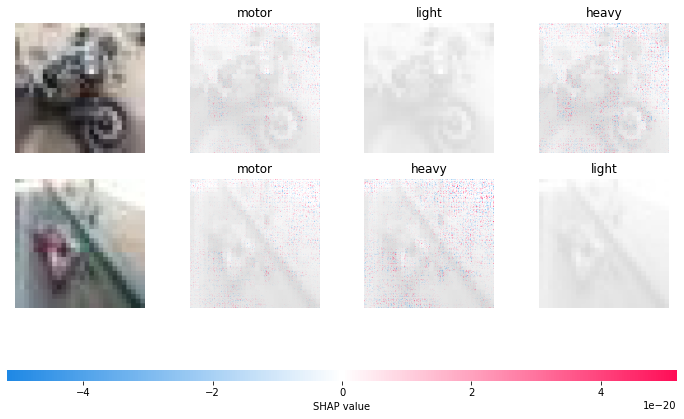

In [ ]:
# explain how the input to the 7th layer of the model explains the top two classes
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [x.copy()]))
    return K.get_session().run(model.layers[layer].input, feed_dict)

indices = np.random.choice(X_train.shape[0], 100, replace=False)
to_explain = X_train[np.random.choice(indices, 2, replace=False)].astype(int)

# move this line outside of the `map2layer` function
e = shap.GradientExplainer(
    (model.layers[2].input, model.layers[-1].output),
    map2layer(X_train[indices, :, :, :], 2),
    local_smoothing=0 # std dev of smoothing noise
)

shap_values, indexes = e.shap_values(map2layer(to_explain, 2), ranked_outputs=3)

# get the names for the classes
class_names = {0:"light",1:"heavy",2:"motor"}
index_names = np.vectorize(lambda x: class_names[x])(indexes)

# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)

## Transfer learning

In [ ]:
example = image.load_img('Accident Images Analysis Dataset/Accident -Detection/2/1789.jpg')
plt.imshow(example)
plt.show()

If you are using a pre-trained ResNetV2 model from Keras, you do not need to perform the image preprocessing steps in the prepare_images function to use the model for image classification. The ResNetV2 model in Keras already includes built-in preprocessing steps, which normalize the input images according to the preprocessing scheme used during training.

The built-in preprocessing steps in Keras involve scaling the pixel values to the range of [-1, 1] and subtracting the mean RGB values of the ImageNet dataset. The ResNetV2 model in Keras expects input images to be in the range of [0, 255], so you will need to scale your input images accordingly.

In [ ]:
basepath = 'Accident Images Analysis Dataset/'

def prepare_images(path, num_classes, preprocessor, load_img_kwargs={}, ext='.jpg'):
  X, y = [], []
  for class_ in range(num_classes):
    for img_path in iglob(path + str(class_ + 1) + '/' + '*' + ext):
      img = image.load_img(img_path, **load_img_kwargs)
      x = image.img_to_array(img)
      x = preprocessor(x)
      X.append(x)
      y.append(class_)
  return np.array(X), np.array(y)

image range van be from 0 to 255,, am setting iit for 224 ,224, is these RESNETV2 is trained  with input size 224x224

Preprcosseing input requirements:
Convert the color space: The input image is converted from RGB color space to BGR color space. This is because ResNetV2 was originally trained on images in BGR format, so the input images must be converted to this format before being fed into the model.

Mean subtraction: The pixel values of the input image are subtracted by the mean RGB value of the ImageNet dataset. This is a common pre-processing step in computer vision applications that helps to center the pixel values around zero and improve the model's ability to learn useful features.

Scaling: The pixel values of the input image are scaled by a factor of 1/255. This step ensures that the pixel values are within the range [0, 1], which is a common requirement for deep learning models.

Standardization: The pixel values of the input image are standardized using channel-wise normalization. This involves subtracting the mean pixel value of each channel and dividing by the standard deviation of the channel. This step helps to reduce the impact of lighting and color variations in the input images.

In [ ]:
X, y = prepare_images(basepath + 'Accident -Detection/', 2, resnet_v2.preprocess_input, load_img_kwargs={'target_size': (224, 224)})
y_cat = to_categorical(y)

len(X), len(y), np.unique(y)

loading pretraine dmodel rssnet_v2

In [ ]:

from tensorflow.keras.applications import ResNet50V2
model = ResNet50V2(weights='imagenet', include_top=True)
model.output

In [ ]:
output = model.predict(np.expand_dims(X[0], axis=0))
output.shape

The pretrained model has been trained on 1000 classes, whereas we only need two classes here. The first way to solve this is to just regard our model as a feature extractor, and use the final 1000-long probability vector as features which can be used by another model. Let's try this out:

In [ ]:
output = model.predict(X)
output.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(output, y_cat, test_size=0.25)

Next, we set up our "model on top". We're going to create a simple fully connected stack here.

In [ ]:
modelontop = Sequential()
modelontop.add(Dense(40, input_dim=1000, activation='relu'))
modelontop.add(Dropout(0.50))
modelontop.add(Dense(64, activation='relu'))
modelontop.add(BatchNormalization())
modelontop.add(Dropout(0.5))
modelontop.add(Dense(20, activation='relu'))
modelontop.add(Dropout(0.25))
modelontop.add(Dense(2, activation='softmax'))
modelontop.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelontop.summary()




Let's train this network for 30 epochs:

In [ ]:
batch_size = 50
epochs     = 30

hist = modelontop.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          verbose=0)

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [ ]:
train_scores = modelontop.evaluate(X_train, y_train, verbose=0)
test_scores = modelontop.evaluate(X_test, y_test, verbose=0)

print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

## trying with hypertuning and not building oo top model

In [ ]:
model = ResNet50V2(weights='imagenet', include_top=False)
model.output

In [ ]:

x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.25)(x)
predictions = Dense(2, activation='softmax')(x)

fullmodel = Model(inputs=model.input, outputs=predictions)
# freeze layers 
for layer in model.layers:
    layer.trainable = False

fullmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


## Original size input
## crahed so many times - fix it later

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.25)

In [ ]:
batch_size = 30
epochs     = 5

hist = fullmodel.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          verbose=2)
# results
train_scores = fullmodel.evaluate(X_train, y_train, verbose=0)
test_scores = fullmodel.evaluate(X_test, y_test, verbose=0)

print("Train loss:", train_scores[0])
print("Train accuracy:", train_scores[1])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

# 